In [1]:
import numpy as np
import pandas as pd
import folium

# 1. 加载 his.npz 数据
pems04 = np.load('his.npz')
data = pems04['data']  # 交通流量数据
print(data)
# 假设 data 的维度是 (时间步长, 传感器数量, 特征维度)
# 我们假设特征维度的第一个是标准化的交通流量数据
print("Data shape:", data.shape)

[[[-0.92738764  0.          0.        ]
  [-0.9657363   0.          0.        ]
  [-0.74842723  0.          0.        ]
  ...
  [-0.9657363   0.          0.        ]
  [-1.01686785  0.          0.        ]
  [-1.08078229  0.          0.        ]]

 [[-0.93377909  0.00347222  0.        ]
  [-1.0679994   0.00347222  0.        ]
  [-0.72286146  0.00347222  0.        ]
  ...
  [-0.99769352  0.00347222  0.        ]
  [-1.13191383  0.00347222  0.        ]
  [-1.09995662  0.00347222  0.        ]]

 [[-0.86986465  0.00694444  0.        ]
  [-1.14469672  0.00694444  0.        ]
  [-0.81873311  0.00694444  0.        ]
  ...
  [-0.89543043  0.00694444  0.        ]
  [-1.12552239  0.00694444  0.        ]
  [-1.03604218  0.00694444  0.        ]]

 ...

 [[-0.90182187  0.98958333  0.28571429]
  [-0.83790744  0.98958333  0.28571429]
  [-0.83151599  0.98958333  0.28571429]
  ...
  [-0.78038445  0.98958333  0.28571429]
  [-0.95295342  0.98958333  0.28571429]
  [-0.95934486  0.98958333  0.28571429]]

 [

In [9]:
import numpy as np
import pandas as pd
import folium

# 假设从 CSV 文件中加载传感器位置信息
sensor_location = pd.read_csv('graph_sensor_locations.csv')  # 包含站点的纬度和经度信息
# 假设包含列: ['station_id', 'latitude', 'longitude']

# 选择某个时间步的数据 (例如第100个时间步)
time_step = 100
flow_data = data[time_step, :, 0]  # 取出第一个特征维度（交通流量）

# 创建 folium 地图对象
mean_lat = sensor_location['latitude'].mean()
mean_lon = sensor_location['longitude'].mean()
m = folium.Map(location=(mean_lat, mean_lon), zoom_start=12)

# 定义颜色和ID映射
color_mapping = {
    3: 'lightblue',
    93: 'lightblue',
    52: 'orange',
    90: 'orange',
    37: 'lightgreen',
    120: 'lightgreen'
}

# 在地图上添加每个传感器的标记，显示其位置和交通流量
for i, row in sensor_location.iterrows():
    tmp_lat = row['latitude']
    tmp_lon = row['longitude']
    tmp_id = row['index']  # 使用正确的 station_id 列
    tmp_flow = flow_data[i]  # 对应传感器的交通流量

    # 根据传感器ID获取颜色
    if tmp_id in color_mapping:
        # 对于特定 ID，使用指定的颜色
        point_color = color_mapping[tmp_id]
        folium.CircleMarker(
            location=(tmp_lat, tmp_lon),
            radius=5,  # 圆点的半径
            #color=point_color,  # 设置边框颜色
             icon=folium.Icon(color=point_color),  # 选择一个预定义的颜色
            popup=f"Station {int(tmp_id)}: Flow={tmp_flow:.2f}"
        ).add_to(m)
    else:
        # 对于其他 ID，使用浅黄色样式
        folium.CircleMarker(
            location=(tmp_lat, tmp_lon),
            radius=10,  # 圆点的半径
            color='lightyellow',  # 设置边框颜色
            fill=True,
            fill_color='lightyellow',  # 填充颜色改为浅黄色
            fill_opacity=0.7,  # 设置透明度
            popup=f"Station {int(tmp_id)}: Flow={tmp_flow:.2f}"
        ).add_to(m)

# 显示地图
m.save("traffic_flow_map.html")  # 将地图保存为 HTML 文件

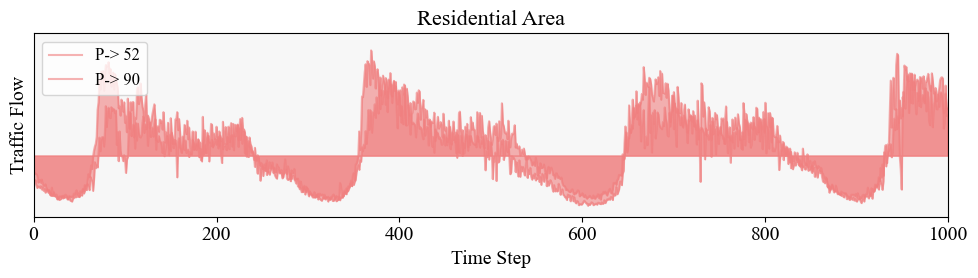

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 假设data是已有的流量数据
# data = ...

# 设置字体为Times New Roman，字体大小为14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14  # 调整字体大小

# 选择Residential Area的点 (52, 90)
point1, point2 = 52, 90

# 创建一个绘图
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# 设置颜色和透明度
color = 'lightcoral'
ylabel = 'Residential Area'
alpha = 0.6

# 设置浅灰色但带透明度的背景
ax.set_facecolor((0.9, 0.9, 0.9, 0.3))  # 浅灰色并带有透明度

# 提取数据
feature_data = data[2000:3000, [point1, point2], 0]

# 绘制山脊图
ax.plot(feature_data[:, 0], label=f'P-> {point1}', color=color, alpha=alpha)
ax.plot(feature_data[:, 1], label=f'P-> {point2}', color=color, alpha=alpha)

# 填充下方区域
ax.fill_between(range(len(feature_data)), feature_data[:, 0], color=color, alpha=alpha)
ax.fill_between(range(len(feature_data)), feature_data[:, 1], color=color, alpha=alpha)

# 设置标题和标签
ax.set_title(ylabel, fontsize=16)  # 设置标题字体大小
ax.set_xlabel('Time Step', fontsize=14)  # 设置x轴标签字体大小
ax.set_ylabel('Traffic Flow', fontsize=14)  # 设置y轴标签字体大小
ax.set_xlim(0, len(feature_data))
ax.legend(loc='upper left', fontsize=12)  # 设置图例字体大小

# 去掉y轴刻度，并设置y轴范围
ax.set_yticks([])
ax.set_ylim(-1.5, 3)

# 调整布局并保存图片
plt.tight_layout()

# 保存为PDF和PNG格式，DPI=3000以确保高分辨率
plt.savefig(f'residential_area_ridge_map.pdf', dpi=3000,bbox_inches='tight')
plt.savefig(f'residential_area_ridge_map.png', dpi=3000,bbox_inches='tight')  # 保存为PNG格式

plt.show()
